<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2005%20%3A%20Transfer%20Learning%20for%20Computer%20Vision/04_transfer_learning_using_tensorflow_and_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRANSFER LEARNING WITH DATA AUGMENTATION**

IMPORT LIBRARIES

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

GET THE DATA

In [4]:
# Data from: https://mmspg.epfl.ch/downloads/food-image-datasets/
# !wget --passive-ftp --prefer-family=ipv4 --ftp-user FoodImage@grebvm2.epfl.ch--ftp-password Cahc1moo -nc ftp://tremplin.epfl.ch/Food-5K.zip
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2023-02-20 06:58:49--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  50.1MB/s    in 9.9s    

2023-02-20 06:58:59 (42.9 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [5]:
## list the files in the directory
!ls

Food-5K.zip  sample_data


In [6]:
## unzip the File Food-5K.zip
!unzip -qq -o Food-5K.zip

In [7]:
## list the files again in the directory.
!ls

Food-5K  Food-5K.zip  __MACOSX	sample_data


In [8]:
## list the files in the Food-5K folder.
!ls Food-5K/

evaluation  training  validation


In [9]:
## check the images in the training folder.
!ls Food-5K/training

0_0.jpg     0_1387.jpg	0_422.jpg  0_809.jpg   1_1195.jpg  1_230.jpg  1_617.jpg
0_1000.jpg  0_1388.jpg	0_423.jpg  0_80.jpg    1_1196.jpg  1_231.jpg  1_618.jpg
0_1001.jpg  0_1389.jpg	0_424.jpg  0_810.jpg   1_1197.jpg  1_232.jpg  1_619.jpg
0_1002.jpg  0_138.jpg	0_425.jpg  0_811.jpg   1_1198.jpg  1_233.jpg  1_61.jpg
0_1003.jpg  0_1390.jpg	0_426.jpg  0_812.jpg   1_1199.jpg  1_234.jpg  1_620.jpg
0_1004.jpg  0_1391.jpg	0_427.jpg  0_813.jpg   1_119.jpg   1_235.jpg  1_621.jpg
0_1005.jpg  0_1392.jpg	0_428.jpg  0_814.jpg   1_11.jpg    1_236.jpg  1_622.jpg
0_1006.jpg  0_1393.jpg	0_429.jpg  0_815.jpg   1_1200.jpg  1_237.jpg  1_623.jpg
0_1007.jpg  0_1394.jpg	0_42.jpg   0_816.jpg   1_1201.jpg  1_238.jpg  1_624.jpg
0_1008.jpg  0_1395.jpg	0_430.jpg  0_817.jpg   1_1202.jpg  1_239.jpg  1_625.jpg
0_1009.jpg  0_1396.jpg	0_431.jpg  0_818.jpg   1_1203.jpg  1_23.jpg   1_626.jpg
0_100.jpg   0_1397.jpg	0_432.jpg  0_819.jpg   1_1204.jpg  1_240.jpg  1_627.jpg
0_1010.jpg  0_1398.jpg	0_433.jpg  0_81.jpg    1_1205.j

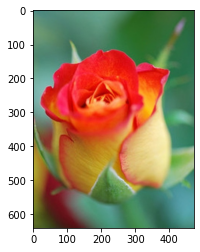

In [10]:
## look at the images.
plt.imshow(image.load_img("Food-5K/training/0_808.jpg"))
plt.show()

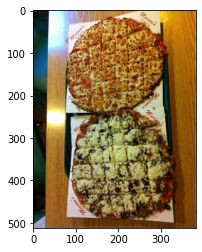

In [11]:
## images that starts with 1
## seems to be food.
plt.imshow(image.load_img("Food-5K/training/1_616.jpg"))
plt.show()

CREATING THE DIRECTORIES

Since the Data is not arranged in the way we need, we are going to make directories to make them as traning, testing and validation folders.

In [12]:
## creating a directory called "data"
!mkdir data

In [13]:
!mkdir data/train
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/train/food
!mkdir data/test/nonfood
!mkdir data/test/food

In [14]:
!ls
!ls data
!ls data/train
!ls data/test

data  Food-5K  Food-5K.zip  __MACOSX  sample_data
test  train
food  nonfood
food  nonfood


In [15]:
## move the files to test and train food and nonfood folders.
## we will consider training to be the train set
## and validation folder will be the test set.
## ignore evaluation set.
!mv Food-5K/training/0*.jpg data/train/nonfood
!mv Food-5K/training/1*.jpg data/train/food
!mv Food-5K/validation/0*.jpg data/test/nonfood
!mv Food-5K/validation/1*.jpg data/test/food


In [16]:
!ls
!ls data
!ls data/train
!ls data/train/nonfood

data  Food-5K  Food-5K.zip  __MACOSX  sample_data
test  train
food  nonfood
0_0.jpg     0_1194.jpg	0_1388.jpg  0_230.jpg  0_424.jpg  0_618.jpg  0_811.jpg
0_1000.jpg  0_1195.jpg	0_1389.jpg  0_231.jpg  0_425.jpg  0_619.jpg  0_812.jpg
0_1001.jpg  0_1196.jpg	0_138.jpg   0_232.jpg  0_426.jpg  0_61.jpg   0_813.jpg
0_1002.jpg  0_1197.jpg	0_1390.jpg  0_233.jpg  0_427.jpg  0_620.jpg  0_814.jpg
0_1003.jpg  0_1198.jpg	0_1391.jpg  0_234.jpg  0_428.jpg  0_621.jpg  0_815.jpg
0_1004.jpg  0_1199.jpg	0_1392.jpg  0_235.jpg  0_429.jpg  0_622.jpg  0_816.jpg
0_1005.jpg  0_119.jpg	0_1393.jpg  0_236.jpg  0_42.jpg   0_623.jpg  0_817.jpg
0_1006.jpg  0_11.jpg	0_1394.jpg  0_237.jpg  0_430.jpg  0_624.jpg  0_818.jpg
0_1007.jpg  0_1200.jpg	0_1395.jpg  0_238.jpg  0_431.jpg  0_625.jpg  0_819.jpg
0_1008.jpg  0_1201.jpg	0_1396.jpg  0_239.jpg  0_432.jpg  0_626.jpg  0_81.jpg
0_1009.jpg  0_1202.jpg	0_1397.jpg  0_23.jpg   0_433.jpg  0_627.jpg  0_820.jpg
0_100.jpg   0_1203.jpg	0_1398.jpg  0_240.jpg  0_434.jpg  0_628.jpg  0_

In [17]:
## defining the train_path and test_path
train_path = "data/train"
print(train_path)
valid_path = "data/test"
print(valid_path)

data/train
data/test


In [18]:
## defining the images size 
## images are pretty big and of different sizes.
## load them all to same smaller size.
IMAGE_SIZE = [200, 200]

In [19]:
## useful for getting the number of files
image_files = glob(train_path + "/*/*.jpg")
print("Number of Images in the Training Path :--",len(image_files))
valid_image_files = glob(valid_path + "/*/*.jpg")
print("Number of Images in the Validation Path :--", len(valid_image_files))

Number of Images in the Training Path :-- 3000
Number of Images in the Validation Path :-- 1000


In [26]:
## useful to get the number of classes.
train_folders = glob(train_path + "/*")
print(train_folders)
valid_folders = glob(valid_path + "/*")
print(valid_folders)

folders = glob(train_path + "/*")

['data/train/nonfood', 'data/train/food']
['data/test/nonfood', 'data/test/food']


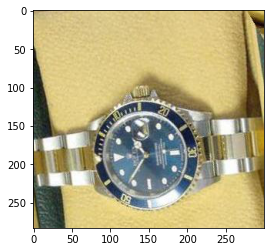

In [21]:
## look at the train images
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

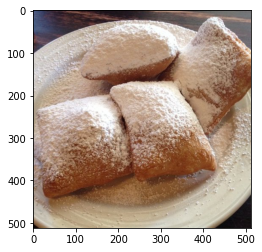

In [22]:
## look at the validation images
plt.imshow(image.load_img(np.random.choice(valid_image_files)))
plt.show()

CREATING MODEL STEP BY STEP

In [23]:
## create an instance of pretrained model
ptm = PretrainedModel(
    input_shape = IMAGE_SIZE + [3],  ## input shape + 3 channels
    weights = "imagenet",            ## weights are imagenet.
    include_top = False              ## include top = False.
)
ptm.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

In [27]:
## freeze pretrained model weights.
ptm.trainable = False

In [28]:
## create the head of the Network
## map the data into feature vector.
## keras image data generator returns classes one hot encoded.
K = len(folders)
print("Number of Classes :--",K)
## flatten the output
x = Flatten()(ptm.output)
## define the dense layer with classes and with activation function = "softmax"
x = Dense(K, activation = "softmax")(x)

Number of Classes :-- 2


In [29]:
## create the model
model = Model(inputs = ptm.input, outputs = x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [30]:
## create and instantiate the ImageDataGenerator
gen = ImageDataGenerator(
    rotation_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    preprocessing_function = preprocess_input
)

In [31]:
## define the batch size
batch_size = 128

In [32]:
## create the data generators.

## train generator
train_generator = gen.flow_from_directory(
    train_path,
    shuffle = True,
    target_size = IMAGE_SIZE,
    batch_size = batch_size
)

## valid generator
valid_generator = gen.flow_from_directory(
    valid_path,
    target_size = IMAGE_SIZE,
    batch_size = batch_size
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
## compile the model
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [34]:
## fit and train the model
r = model.fit_generator(
    train_generator,
    validation_data = valid_generator,
    epochs = 10,
    steps_per_epoch = int(np.ceil(len(image_files)/batch_size)),  ## 24
    validation_steps = int(np.ceil(len(valid_image_files)/batch_size)),  ## 8
)

<ipython-input-34-95c1c4456d0a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
24/24 [==============================] - 2010s 84s/step - loss: 1.7278 - accuracy: 0.9223 - val_loss: 0.7279 - val_accuracy: 0.9640
Epoch 2/10
24/24 [==============================] - 1977s 83s/step - loss: 0.4671 - accuracy: 0.9800 - val_loss: 0.6284 - val_accuracy: 0.9670
Epoch 3/10
24/24 [==============================] - 1980s 83s/step - loss: 0.2792 - accuracy: 0.9867 - val_loss: 0.8356 - val_accuracy: 0.9680
Epoch 4/10
24/24 [==============================] - 1983s 83s/step - loss: 0.1980 - accuracy: 0.9890 - val_loss: 0.8858 - val_accuracy: 0.9720
Epoch 5/10
24/24 [==============================] - 1979s 83s/step - loss: 0.1495 - accuracy: 0.9903 - val_loss: 0.9515 - val_accuracy: 0.9670
Epoch 6/10
24/24 [==============================] - 1977s 83s/step - loss: 0.1348 - accuracy: 0.9910 - val_loss: 0.7929 - val_accuracy: 0.9650
Epoch 7/10
24/24 [==============================] - 1977s 83s/step - loss: 0.0716 - accuracy: 0.9923 - val_loss: 0.9911 - val_accuracy: 0.9660

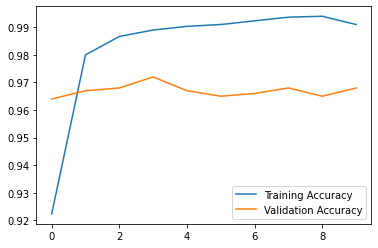

In [36]:
## plot of accuracy
plt.plot(r.history["accuracy"], label = "Training Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show()

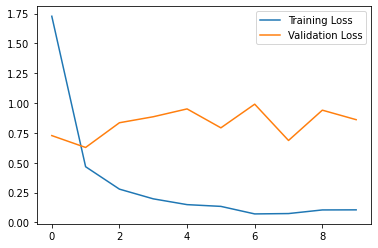

In [37]:
## plot the losses
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show()

***